# Starbucks Geographical Analysis I

### City or country that has the highest number of Starbucks stores per capita

In [5]:
def get_city_max():
    
    import pandas as pd
    import numpy as np
    
    datafile = 'directory.csv'
    data = pd.read_csv(datafile)
    data['City'].replace('', np.nan, inplace=True)
    data.dropna(subset=['City'], inplace=True)
    data.groupby('City')['Store Number'].apply(lambda x: list(x)).to_dict()
    
    city_rank = data.groupby('City')['Store Number'].apply(lambda x: len(x))
    return city_rank.idxmax()

####   Output city with maximum number of Starbucks Stores

In [6]:
get_city_max() # Shanghai City

'上海市'

In [7]:
def get_city_min():
    
    import pandas as pd
    import numpy as np
    
    datafile = 'directory.csv'
    data = pd.read_csv(datafile)
    data['City'].replace('', np.nan, inplace=True)
    data.dropna(subset=['City'], inplace=True)
    data.groupby('City')['Store Number'].apply(lambda x: list(x)).to_dict()
    
    city_rank = data.groupby('City')['Store Number'].apply(lambda x: len(x))
    return city_rank.idxmin()

#### Output city with minimum number of Starbucks Store

In [8]:
get_city_min()

"'s-Hertogenbosch"

In [15]:
def city_number_starbucks():
    
    import pandas as pd
    import numpy as np
    
    datafile = 'directory.csv'
    data = pd.read_csv(datafile)
    data['City'].replace('', np.nan, inplace=True)
    data.dropna(subset=['City'], inplace=True)
    data.groupby('City')['Store Number'].apply(lambda x: list(x)).to_dict()
    
    city = input()
    
    city_rank = data.groupby('City')['Store Number'].apply(lambda x: len(x))
    return city_rank[city]

#### Key in city to get the number of Starbucks Stores


In [16]:
city_number_starbucks() # input City to get the number of store

Bangkok


73

In [26]:
def get_country_max():
    
    import pandas as pd
    import numpy as np
    
    datafile = 'directory.csv'
    data = pd.read_csv(datafile)
    data['City'].replace('', np.nan, inplace=True)
    data.dropna(subset=['City'], inplace=True)
    data.groupby('City')['Store Number'].apply(lambda x: list(x)).to_dict()
    
    data['Country'].replace('', np.nan, inplace=True)
    data.groupby('Country')['Store Number'].apply(lambda x: list(x)).to_dict()
    country_rank = data.groupby('Country')['Store Number'].apply(lambda x: len(x))
    
    import pycountry
    countries = {}
    for country in pycountry.countries:
        countries[country.name] = country.alpha_2
    
    return list(countries.keys())[list(countries.values()).index(country_rank.idxmax())]

#### Output country with maximum number of Starbucks Store

In [27]:
get_country_max()

'United States'

In [41]:
def get_country_min():
    
    import pandas as pd
    import numpy as np
    
    datafile = 'directory.csv'
    data = pd.read_csv(datafile)
    data['City'].replace('', np.nan, inplace=True)
    data.dropna(subset=['City'], inplace=True)
    data.groupby('City')['Store Number'].apply(lambda x: list(x)).to_dict()
    
    data['Country'].replace('', np.nan, inplace=True)
    data.groupby('Country')['Store Number'].apply(lambda x: list(x)).to_dict()
    country_rank = data.groupby('Country')['Store Number'].apply(lambda x: len(x))
    
    import pycountry
    countries = {}
    for country in pycountry.countries:
        countries[country.name] = country.alpha_2
        
    return list(countries.keys())[list(countries.values()).index(country_rank.idxmin())]

#### Output city with minimum number of Starbucks Store

In [42]:
get_country_min()

'Andorra'

In [30]:
def country_number_starbucks():
    
    import pandas as pd
    import numpy as np
    
    datafile = 'directory.csv'
    data = pd.read_csv(datafile)
    data['City'].replace('', np.nan, inplace=True)
    data.dropna(subset=['City'], inplace=True)
    data.groupby('City')['Store Number'].apply(lambda x: list(x)).to_dict()
    
    data['Country'].replace('', np.nan, inplace=True)
    data.groupby('Country')['Store Number'].apply(lambda x: list(x)).to_dict()
    country_rank = data.groupby('Country')['Store Number'].apply(lambda x: len(x))
    
    import pycountry
    countries = {}
    for country in pycountry.countries:
        countries[country.name] = country.alpha_2
    
    input_country = input()
    codes = countries.get(input_country)
    return country_rank[codes]

#### Key in country to get the number of Starbucks Stores

In [31]:
country_number_starbucks() # input the country to get the number of store

Thailand


289

# Get current location and find the furthest Starbucks Location

In [54]:
def get_current_location():
    
    import os
    import requests
    from bs4 import BeautifulSoup
    import numpy as np
    
    location_url = 'https://geoiptool.com'
    page = requests.get(location_url)
    if page.status_code !=200:
        return 'Failed'
    else:
        page_data = BeautifulSoup(page.content, 'lxml')
        side_bar = page_data.find(class_='sidebar-data hidden-xs hidden-sm')
        data_items = side_bar.find_all(class_='data-item')
        lat,lon = np.NaN, np.NaN
        for item in data_items:
            name = item.span.get_text()
            if 'Longitude' in name:
                lon = float(item.span.next_sibling.next_sibling.get_text())
            elif 'Latitude' in name:
                lat = float(item.span.next_sibling.next_sibling.get_text())
                
        return lat,lon

In [55]:
def furthest_starbucks():
    
    import pandas as pd
    import numpy as np
    import requests
    
    datafile = 'directory.csv'
    data_stars = pd.read_csv(datafile).set_index('Store Number')
    data_stars['City'].replace('', np.nan, inplace=True)
    data_stars.dropna(subset=['City'], inplace=True)
    data_stars['Latitude'].replace('', np.nan, inplace=True)
    data_stars.dropna(subset=['Latitude'], inplace=True)
    data_stars['Longitude'].replace('', np.nan, inplace=True)
    data_stars.dropna(subset=['Longitude'], inplace=True)
    
    lat = get_current_location()[0]
    lon = get_current_location()[1]
    #Calculate the distance to each starbucks. Make negetive to take argmax later
    distance = data_stars.apply(lambda x: - np.linalg.norm(np.array((lon - x['Longitude'], lat - x['Latitude']))), axis=1)
    furthest = distance.idxmin()
    return data_stars.loc[furthest]

#### Output Starbucks Store that is furthest from the current location


In [56]:
furthest_starbucks() # furthest starbucks location from where you are

Brand                              Starbucks
Store Name                            Napier
Ownership Type                      Licensed
Street Address            Emerson St, Napier
City                                  Napier
State/Province                             N
Country                                   NZ
Postcode                                 NaN
Phone Number                     06 834 2447
Timezone          GMT+12:00 Pacific/Auckland
Longitude                             176.92
Latitude                              -39.49
Name: 33842-97882, dtype: object

# What two Starbucks locations are the closest in proximity to one another? 

In [72]:
def map_store():
    import gmplot
    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    
    import pandas as pd
    import numpy as np
    import requests
    
    import warnings
    warnings.filterwarnings("ignore")
    
    datafile = 'directory.csv'
    data_stars = pd.read_csv(datafile).set_index('Store Number')
    data_stars['City'].replace('', np.nan, inplace=True)
    data_stars.dropna(subset=['City'], inplace=True)
    data_stars['Latitude'].replace('', np.nan, inplace=True)
    data_stars.dropna(subset=['Latitude'], inplace=True)
    data_stars['Longitude'].replace('', np.nan, inplace=True)
    data_stars.dropna(subset=['Longitude'], inplace=True)
    
    lats = data_stars['Latitude'].tolist()
    lons = data_stars['Longitude'].tolist()
    
    fig = plt.figure(figsize = (15,5))

    ax = fig.add_subplot(121)
    ax.set_title("Starbucks Locations in North America")
    map = Basemap(projection='ortho', lat_0 = 50, lon_0 = -30,
                  resolution = 'l', area_thresh = 1000.)
    map.bluemarble()
    x,y = map(lons,lats)
    map.plot(x,y,'yo')

    ax = fig.add_subplot(122)
    ax.set_title("Starbucks Locations in Asia")
    map_2 = Basemap(projection='ortho', lat_0 = 50, lon_0 = 70,
              resolution = 'l', area_thresh = 1000.)
    map_2.bluemarble()
    x,y = map_2(lons,lats)
    map_2.plot(x,y,"yo")
    
    plt.show()

#### Show Starbuck Location in the world

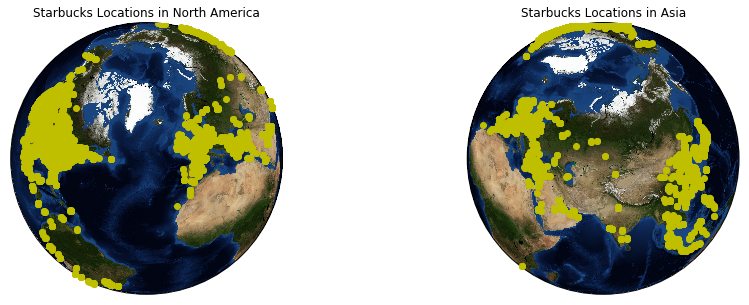

In [73]:
map_store() # green dots represent the Starbucks shops 

In [84]:
def stores_next_to_each_other():
    
    from scipy.spatial import distance
    import geopy.distance
    import pandas as pd
    import numpy as np
    import requests
    
    starbucks = pd.read_csv("starbucks_tot.csv").set_index('Store Number')
    
    distance = []
    for store in starbucks.index:
        lat = starbucks.loc[store].Latitude
        lon = starbucks.loc[store].Longitude
        a = (lat, lon)
    
        lat_b = starbucks.loc[store].Nearest_Store_Latitude
        lon_b = starbucks.loc[store].Nearest_Store_Longitude
        b = (lat_b, lon_b)
    
        distance.append(geopy.distance.vincenty(a, b).km) 
        
    starbucks['Distance_Btw_2_Stores'] = distance
    return starbucks.loc[starbucks['Distance_Btw_2_Stores'] == starbucks.Distance_Btw_2_Stores.min()]

#### Output the list of Starbucks Locations that has the minimum distance to other Starbucks Location nearby

In [85]:
stores_next_to_each_other() # there are 9398 stores that are very close to each other (almost 0 km)

,Street Address,City,State/Province,Country,Longitude,Latitude,Nearest_Store,Nearest_Store_Latitude,Nearest_Store_Longitude,Distance_Btw_2_Stores
Store Number,,,,,,,,,,
22126-218024,Al Salam Street,Abu Dhabi,AZ,AE,54.38,24.48,20423-205465,24.48,54.38,0.0
17688-182164,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,54.49,24.40,18182-182165,24.40,54.49,0.0
18182-182165,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,54.49,24.40,17688-182164,24.40,54.49,0.0
23359-229184,Yas Island,Abu Dhabi,AZ,AE,54.61,24.46,24085-235545,24.46,54.61,0.0
30781-99022,Khalidiya St.,Abu Dhabi,AZ,AE,55.69,24.19,32595-122105,24.19,55.69,0.0
20423-205465,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,54.38,24.48,22126-218024,24.48,54.38,0.0
20424-205466,Corniche Street,Abu Dhabi,AZ,AE,54.34,24.47,29560-238539,24.47,54.34,0.0
32595-122105,"Khalidiya St., Beside Union Cooperative Society",Abu Dhabi,AZ,AE,55.69,24.19,30781-99022,24.19,55.69,0.0
29560-238539,"Corniche Road , Abu Dhabi",Abu Dhabi,AZ,AE,54.34,24.47,20424-205466,24.47,54.34,0.0


In [90]:
def map_store_next_to_each_other():
    import gmplot
    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    
    import pandas as pd
    import numpy as np
    import requests
    
    from scipy.spatial import distance
    import geopy.distance
    
    import warnings
    warnings.filterwarnings("ignore")
    
    starbucks = pd.read_csv("starbucks_tot.csv").set_index('Store Number')
    distance = []
    for store in starbucks.index:
        lat = starbucks.loc[store].Latitude
        lon = starbucks.loc[store].Longitude
        a = (lat, lon)
    
        lat_b = starbucks.loc[store].Nearest_Store_Latitude
        lon_b = starbucks.loc[store].Nearest_Store_Longitude
        b = (lat_b, lon_b)
    
        distance.append(geopy.distance.vincenty(a, b).km) 
    
    starbucks['Distance_Btw_2_Stores'] = distance
    starbucks['Distance_Btw_2_Stores'].describe()
    lats_n = starbucks['Latitude'].tolist()
    lons_n = starbucks['Longitude'].tolist()
    
    fig = plt.figure(figsize = (15,5))

    ax = fig.add_subplot(121)
    ax.set_title("2 Close Starbucks Locations in North America")
    map_3 = Basemap(projection='ortho', lat_0 = 50, lon_0 = -30, resolution = 'l', area_thresh = 1000.)
    map_3.bluemarble()
    x,y = map_3(lons_n,lats_n)
    map_3.plot(x,y,"yo")

    ax = fig.add_subplot(122)
    ax.set_title("2 Close Starbucks Starbucks Locations in Asia")
    map_4 = Basemap(projection='ortho', lat_0 = 50, lon_0 = 70, resolution = 'l', area_thresh = 1000.)
    map_4.bluemarble()
    x,y = map_4(lons_n,lats_n)
    map_4.plot(x,y,"yo")
    
    plt.show()

#### Show Starbuck Locations with Closest Proximity in the world

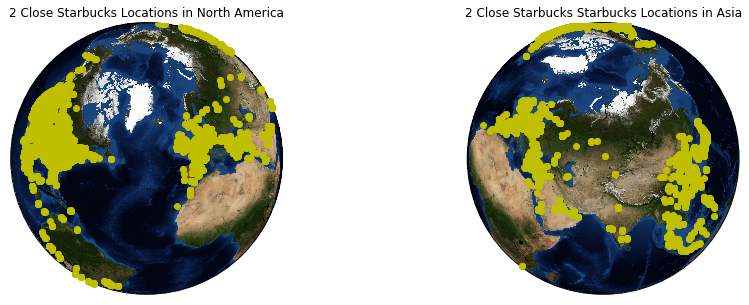

In [91]:
# green dots represent the store right next to each other (less dense than the two maps above)
map_store_next_to_each_other()